<a href="https://colab.research.google.com/github/Sottim/AIDA-Spring2023/blob/main/Week10_RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries

import numpy as np                  #Numerical Python
import pandas as pd                 #Python Dataframe
import seaborn as sns               #for Plotting
import matplotlib.pyplot as plt     #for Plotting
import statsmodels.api as sm        #regression function resides here

In [ ]:
# Read data
data = pd.read_csv("Regression.csv")
data.head()

,Height(x),Weight(y)
0,63,127
1,64,121
2,66,142
3,69,157
4,69,162


In [ ]:
data.describe()

,Height(x),Weight(y)
count,10.000000,10.000000
mean,69.300000,158.800000
std,3.917199,25.385035
min,63.000000,121.000000
25%,66.750000,145.500000
50%,70.000000,159.500000
75%,71.750000,168.000000
max,75.000000,208.000000


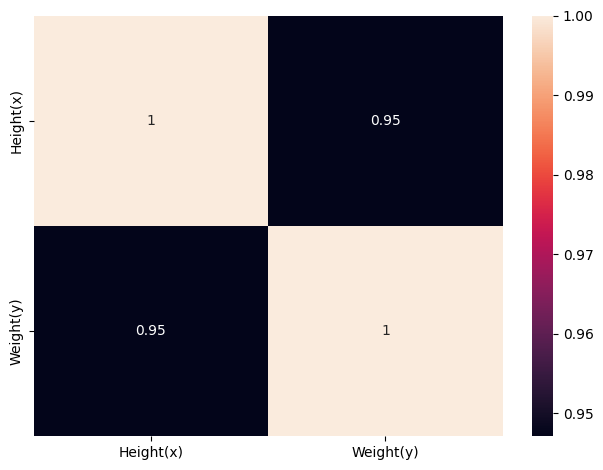

In [ ]:
#heatmap is avaailable in Seaborn
sns.heatmap(data[['Height(x)', 'Weight(y)']].corr(), annot=True, fmt='.2g') #fmt = format to 2 decimal point
plt.tight_layout()

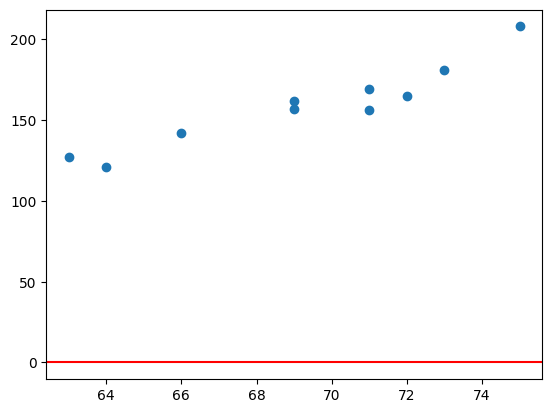

In [ ]:
#Scatter plot to check for linearity b/w x and y

plt.scatter(data['Height(x)'], data['Weight(y)'])
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

In [ ]:
# Assigning X and Y
X = data['Height(x)']
Y = data['Weight(y)']

In [ ]:
# Doing a regression 
X = sm.add_constant(X)

#Those who made python forgot to add the Constant that is Y = mX + C, where C is the constant 

model = sm.OLS(Y,X)     #OLS stands for Ordinary least square also known as Best Fit Lime
results = model.fit()   # fit the data on the model
results.params          # give me the final parameters
#Equation of line is Weight_Predicted = -266.53 + 6.13 * Height

const       -266.534395
Height(x)      6.137581
dtype: float64

results.summary()

In [ ]:
# Prediction based on model
Weight_predicted = results.predict(X)
print(Weight_predicted)


0    120.133237
1    126.270818
2    138.545981
3    156.958726
4    156.958726
5    169.233888
6    169.233888
7    175.371470
8    181.509051
9    193.784214
dtype: float64


In [ ]:
# Computation of Error
data['pred'] = Weight_predicted
data['error'] = Y - Weight_predicted
data.head()

,Height(x),Weight(y),pred,error
0,63,127,120.133237,6.866763
1,64,121,126.270818,-5.270818
2,66,142,138.545981,3.454019
3,69,157,156.958726,0.041274
4,69,162,156.958726,5.041274


In [ ]:
#Computer Mean Square Error
import sklearn.metrics
sklearn.metrics.mean_squared_error(Y, data['pred'])

59.73859522085441

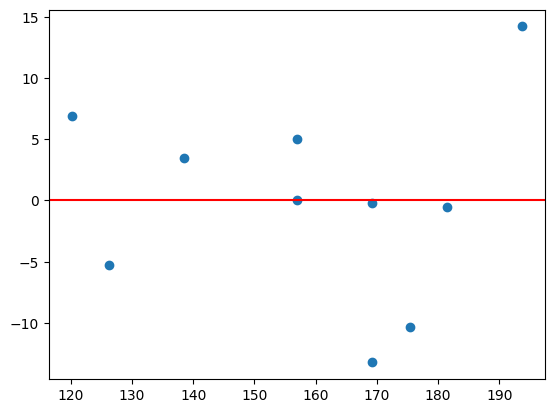

In [ ]:
#Residual plot

plt.scatter(data['pred'], data['error'])
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

In [ ]:
#Check the Null Hypothesis : Error is normally distributed
# when p-value < 0.05 reject the null hypothesis

from scipy.stats import shapiro
shapiro(np.abs(data['error']))

ShapiroResult(statistic=0.9069376587867737, pvalue=0.260611355304718)

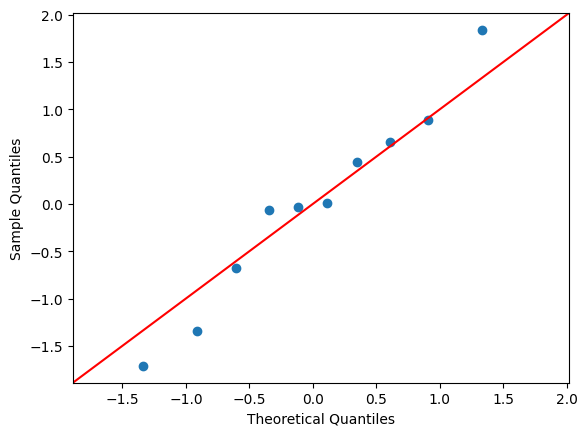

In [ ]:
#Plot of the QQ Curve
#Quantile - Quantile

fig = sm.qqplot(data['error'], fit=True, line = '45')
plt.show()